In [1]:
from matplotlib import pyplot as plt
import numpy as np

import matplotlib.path as mpath
import matplotlib.patches as mpatches

Path = mpath.Path

[array([-0.17980737,  1.44951843]), array([0.        , 0.55048157]), array([0.17980737, 1.44951843])]


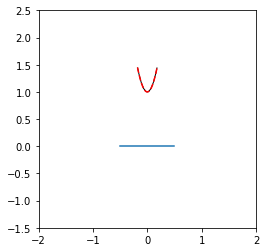

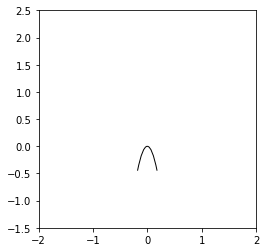

In [29]:
fig, ax = plt.subplots()

def c(γ):
    return (γ*np.sqrt(1+γ**2)+np.arcsinh(γ))/(2*γ)

def χ(t, T=1, γ=5, τ=1):
    x = (T/c(γ))*(t-0.5)
    y = τ + (T/c(γ))*γ*(t-0.5)**2
    return np.vstack((x,y)).T


def start_point(T=1, γ=5, τ=1):
    return np.array([-T/(2*c(γ)), τ+γ*T/(4*c(γ))])

def end_point(T=1, γ=5, τ=1):
    return np.array([T/(2*c(γ)), τ+γ*T/(4*c(γ))])

def control_point(T=1, γ=5, τ=1):
    return np.array([0, τ-γ*T/(4*c(γ))])

def flip(xy):
    return np.array((xy[0],1-xy[1]))

trange = np.linspace(0,1,100)
points = χ(trange)

ax.plot(points[:,0], points[:,1], linestyle='--', color='r')
print([start_point(), control_point(), end_point()])

ax.plot(np.linspace(-0.5, 0.5, 100), np.zeros(100))

ax.set_xlim([-2,2])
ax.set_ylim([-1.5, 2.5])
ax.set_aspect('equal')

ax.add_patch(mpatches.PathPatch(
    Path([start_point(), control_point(), end_point()], [Path.MOVETO, Path.CURVE3, Path.CURVE3]), fc="none", transform=ax.transData))

fig, ax = plt.subplots()
ax.set_xlim([-2,2])
ax.set_ylim([-1.5, 2.5])
ax.set_aspect('equal')
ax.add_patch(mpatches.PathPatch(
    Path([flip(start_point()), flip(control_point()), flip(end_point())], [Path.MOVETO, Path.CURVE3, Path.CURVE3]), fc="none", transform=ax.transData))

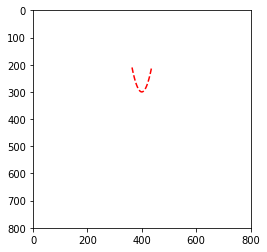

In [22]:
# compute new coordinates. Box is 800x800 and top left corner is (0,0).
# in old coordinates, box is 4x4 and top left corner is (-2,2.5)

scale = 800/4 #200

def p1(x):
    return (x + 2) * scale
def p2(y):
    return -(y - 2.5) * scale
def p(xy):
    return np.array((p1(xy[0]), p2(xy[1])))

fig, ax = plt.subplots()
ax.set_xlim([0,800])
ax.set_ylim([0,800])
ax.invert_yaxis()
ax.set_aspect('equal')

ax.plot(p1(points[:,0]), p2(points[:,1]), linestyle='--', color='r')

In [30]:
print("------Unflipped parabola-------")
print("Start: {}".format(p(start_point())))
print("Control: {}".format(p(control_point())))
print("End: {}".format(p(end_point())))
print("\n------Flipped parabola-------")
print("Start: {}".format(p(flip(start_point()))))
print("Control: {}".format(p(flip(control_point()))))
print("End: {}".format(p(flip(end_point()))))

------Unflipped parabola-------
Start: [364.03852527 210.09631317]
End: [435.96147473 210.09631317]
Control: [400.         389.90368683]

------Flipped parabola-------
Start: [364.03852527 589.90368683]
End: [435.96147473 589.90368683]
Control: [400.         410.09631317]
